<div style="display: flex; align-items: center; justify-content: center;">
    <img src="https://upload.wikimedia.org/wikipedia/commons/f/fb/Escudo-UdeA.svg" width="150" style="margin-right: 20px;">
    <div>

# **Machine Learning I - Clasificación**


# **Contenido**
1. Autores

2. Descripción corta del dataset

3. Objeto a desarrollar

4. Resumen del proceso realizado

5. Desarrollo de experimentos

    • 5.1 Preparación de datos

    • 5.2 División conjunto datos

    • 5.3 Creación, entrenamiento y evaluación de modelos

6. Evaluación entre diferentes modelos de clasificación

7. Conclusiones

8. Referencias


# **1. Autores**

### Cristhian Ocampo Bolivar
### Maria Isabel Duque Buitrago
### Leidy Estefanía Silva Torres



 # **2. Descripción corta del dataset**


Este conjunto de datos contiene información completa sobre la salud de 2149 pacientes el cual incluye información demográfica, factores de estilo de vida, historial médico, mediciones clínicas, evaluaciones cognitivas y funcionales, síntomas y un diagnóstico de la enfermedad de Alzheimer.

| *Categoría*                   | *Variable*                   | *Tipo / Rango*                  | *Descripción*                                                   |
|--------------------------------|--------------------------------|----------------------------------|-------------------------------------------------------------------|
| *Patient Information*         | PatientID                      | 4751–6900                        | Identificador único del paciente                                 |
| *Demographic Details*         | Age                            | 60–90 años                       | Edad del paciente                                                 |
|                                | Gender                         | 0 = Hombre, 1 = Mujer            | Género del paciente                                               |
|                                | Ethnicity                      | 0 = Caucásico, 1 = Afroamericano, 2 = Asiático, 3 = Otro | Grupo étnico                                                      |
|                                | EducationLevel                 | 0 = Ninguno, 1 = Secundaria, 2 = Licenciatura, 3 = Posgrado | Nivel educativo                                                  |
| *Lifestyle Factors*           | BMI                            | 15–40                            | Índice de Masa Corporal                                           |
|                                | Smoking                        | 0 = No, 1 = Sí                   | Fuma actualmente                                                  |
|                                | AlcoholConsumption             | 0–20 unidades/semana            | Consumo semanal de alcohol                                        |
|                                | PhysicalActivity               | 0–10 horas/semana               | Actividad física semanal                                          |
|                                | DietQuality                    | 0–10                            | Puntuación de calidad de la dieta                                 |
|                                | SleepQuality                   | 4–10                            | Puntuación de calidad del sueño                                   |
| *Medical History*             | FamilyHistoryAlzheimers       | 0 = No, 1 = Sí                   | Antecedentes familiares de Alzheimer                              |
|                                | CardiovascularDisease          | 0 = No, 1 = Sí                   | Enfermedad cardiovascular                                         |
|                                | Diabetes                       | 0 = No, 1 = Sí                   | Presencia de diabetes                                             |
|                                | Depression                     | 0 = No, 1 = Sí                   | Presencia de depresión                                            |
|                                | HeadInjury                     | 0 = No, 1 = Sí                   | Historial de lesión en la cabeza                                  |
|                                | Hypertension                   | 0 = No, 1 = Sí                   | Presencia de hipertensión                                         |
| *Clinical Measurements*       | SystolicBP                     | 90–180 mmHg                     | Presión sistólica                                                 |
|                                | DiastolicBP                    | 60–120 mmHg                     | Presión diastólica                                                |
|                                | CholesterolTotal               | 150–300 mg/dL                   | Colesterol total                                                  |
|                                | CholesterolLDL                 | 50–200 mg/dL                    | Colesterol LDL (malo)                                             |
|                                | CholesterolHDL                 | 20–100 mg/dL                    | Colesterol HDL (bueno)                                            |
|                                | CholesterolTriglycerides      | 50–400 mg/dL                    | Triglicéridos                                                     |
| *Cognitive & Functional*      | MMSE                           | 0–30                            | Mini-Examen del Estado Mental                                     |
|                                | FunctionalAssessment           | 0–10                            | Evaluación funcional                                              |
|                                | MemoryComplaints              | 0 = No, 1 = Sí                   | Quejas de memoria                                                 |
|                                | BehavioralProblems            | 0 = No, 1 = Sí                   | Problemas de comportamiento                                       |
|                                | ADL                            | 0–10                            | Actividades de la vida diaria                                     |
| *Symptoms*                    | Confusion                      | 0 = No, 1 = Sí                   | Presencia de confusión                                            |
|                                | Disorientation                 | 0 = No, 1 = Sí                   | Presencia de desorientación                                       |
|                                | PersonalityChanges             | 0 = No, 1 = Sí                   | Cambios de personalidad                                           |
|                                | DifficultyCompletingTasks     | 0 = No, 1 = Sí                   | Dificultad para completar tareas                                  |
|                                | Forgetfulness                  | 0 = No, 1 = Sí                   | Olvidos frecuentes                                                |
| *Diagnosis Information*       | Diagnosis                      | 0 = No Alzheimer, 1 = Sí         | Diagnóstico de Alzheimer                                          |
| *Confidential Info*           | DoctorInCharge                 | XXXConfid                        | Información confidencial del médico tratante                     |

# **3. Objetivo a desarrollar**

El objetivo de este trabajo es obtener un modelo de predicción de la
enfermedad con base en las variables de entrada mas significativas para los pacientes.

# **4. Resumen del proceso realizado**

Este proyecto abordó la clasificación de pacientes con enfermedad de Alzheimer basados en datos sobre historial médico, familiar y factores de estilo de vida. Se limpiaron y transformaron los datos y se entrenaron varios modelos de clasificación. El modelo Random Forest obtuvo el mejor rendimiento con un f1-score de 0.92. Finalmente, el modelo entrenado fue guardado para su implementación futura, evidenciando su potencial como herramienta de apoyo en la toma de decisiones clínicas relacionadas con esta enfermedad.

# **5. Desarrollo de experimentos**

##5.1 • Preparación de datos



Librerias

In [ ]:
import pandas as pd
import numpy as np
import math

from imblearn.over_sampling import RandomOverSampler
from sklearn.neighbors import LocalOutlierFactor

import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import joblib

#Modelo regresión Logistica
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, auc, roc_auc_score, roc_curve

#Modelo Máquina de vectores de soporte
from sklearn import svm
from sklearn.svm import SVC

#Modelo árboles de decisión
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree


#configuracion de hiperparámetros
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score


#librerias para Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import ParameterGrid
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier


from imblearn.over_sampling import RandomOverSampler
from sklearn.neighbors import LocalOutlierFactor

import warnings
warnings.filterwarnings('ignore')

Carga de datos

In [ ]:
df = pd.read_csv('/content/alzheimers_disease_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [ ]:
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.9277,0,13.2972,6.3271,1.3472,...,0,0,1.7259,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.8277,0,4.5425,7.6199,0.5188,...,0,0,2.5924,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.7959,0,19.5551,7.8450,1.8263,...,0,0,7.1195,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.8008,1,12.2093,8.4280,7.4356,...,0,1,6.4812,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.7170,0,18.4544,6.3105,0.7955,...,0,0,0.0147,0,0,1,1,0,0,XXXConfid


Limpieza de datos (Data Cleaning)

Se eliminan las variables PatientID y DoctorInCharge del Dataset ya que se considera que no son relevantes para los modelos de clasificación a analizar.



In [ ]:
#Eliminación de variables que no se emplearán
df.drop(['PatientID','DoctorInCharge'], axis='columns', inplace=True)
df.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,73,0,0,2,22.9277,0,13.2972,6.3271,1.3472,9.0257,...,6.5189,0,0,1.7259,0,0,0,1,0,0
1,89,0,0,0,26.8277,0,4.5425,7.6199,0.5188,7.1513,...,7.1187,0,0,2.5924,0,0,0,0,1,0
2,73,0,3,1,17.7959,0,19.5551,7.8450,1.8263,9.6736,...,5.8951,0,0,7.1195,0,1,0,1,0,0
3,74,1,0,1,33.8008,1,12.2093,8.4280,7.4356,8.3926,...,8.9651,0,1,6.4812,0,0,0,0,0,0
4,89,0,0,0,20.7170,0,18.4544,6.3105,0.7955,5.5972,...,6.0450,0,0,0.0147,0,0,1,1,0,0


In [ ]:
#Identificación de duplicados
df.loc[df.duplicated()]

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis


Visualización de los datos



In [ ]:
# División de variables binarias (categoricas)
catCol = [
    'Ethnicity', 'EducationLevel','Gender', 'Smoking', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
    'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'MemoryComplaints',
    'BehavioralProblems', 'Confusion', 'Disorientation', 'PersonalityChanges',
    'DifficultyCompletingTasks', 'Forgetfulness', 'Diagnosis'
]


df[catCol].head(2)

,Ethnicity,EducationLevel,Gender,Smoking,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,MemoryComplaints,BehavioralProblems,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,0,2,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
df_encoded = df.copy()

for col in catCol:
    if col in ['Smoking', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
               'Diabetes', 'Depression', 'HeadInjury', 'Hypertension',
               'MemoryComplaints', 'BehavioralProblems', 'Confusion',
               'Disorientation', 'PersonalityChanges',
               'DifficultyCompletingTasks', 'Forgetfulness', 'Diagnosis']:
        df_encoded[col] = df_encoded[col].replace({0: 'No', 1: 'Si'})
    elif col == 'Ethnicity':
        df_encoded[col] = df_encoded[col].replace({0: 'Caucasico', 1: 'Afroamericano', 2: 'Asiatico', 3: 'Otro'})
    elif col == 'EducationLevel':
        df_encoded[col] = df_encoded[col].replace({0: 'Ninguno', 1: 'Secundaria', 2: 'Licenciatura', 3: 'Posgrado'})
    elif col == 'Gender':
        df_encoded[col] = df_encoded[col].replace({0: 'Hombre', 1: 'Mujer'})

df_encoded.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,73,Hombre,Caucasico,Licenciatura,22.9277,No,13.2972,6.3271,1.3472,9.0257,...,6.5189,No,No,1.7259,No,No,No,Si,No,No
1,89,Hombre,Caucasico,Ninguno,26.8277,No,4.5425,7.6199,0.5188,7.1513,...,7.1187,No,No,2.5924,No,No,No,No,Si,No
2,73,Hombre,Otro,Secundaria,17.7959,No,19.5551,7.8450,1.8263,9.6736,...,5.8951,No,No,7.1195,No,Si,No,Si,No,No
3,74,Mujer,Caucasico,Secundaria,33.8008,Si,12.2093,8.4280,7.4356,8.3926,...,8.9651,No,Si,6.4812,No,No,No,No,No,No
4,89,Hombre,Caucasico,Ninguno,20.7170,No,18.4544,6.3105,0.7955,5.5972,...,6.0450,No,No,0.0147,No,No,Si,Si,No,No


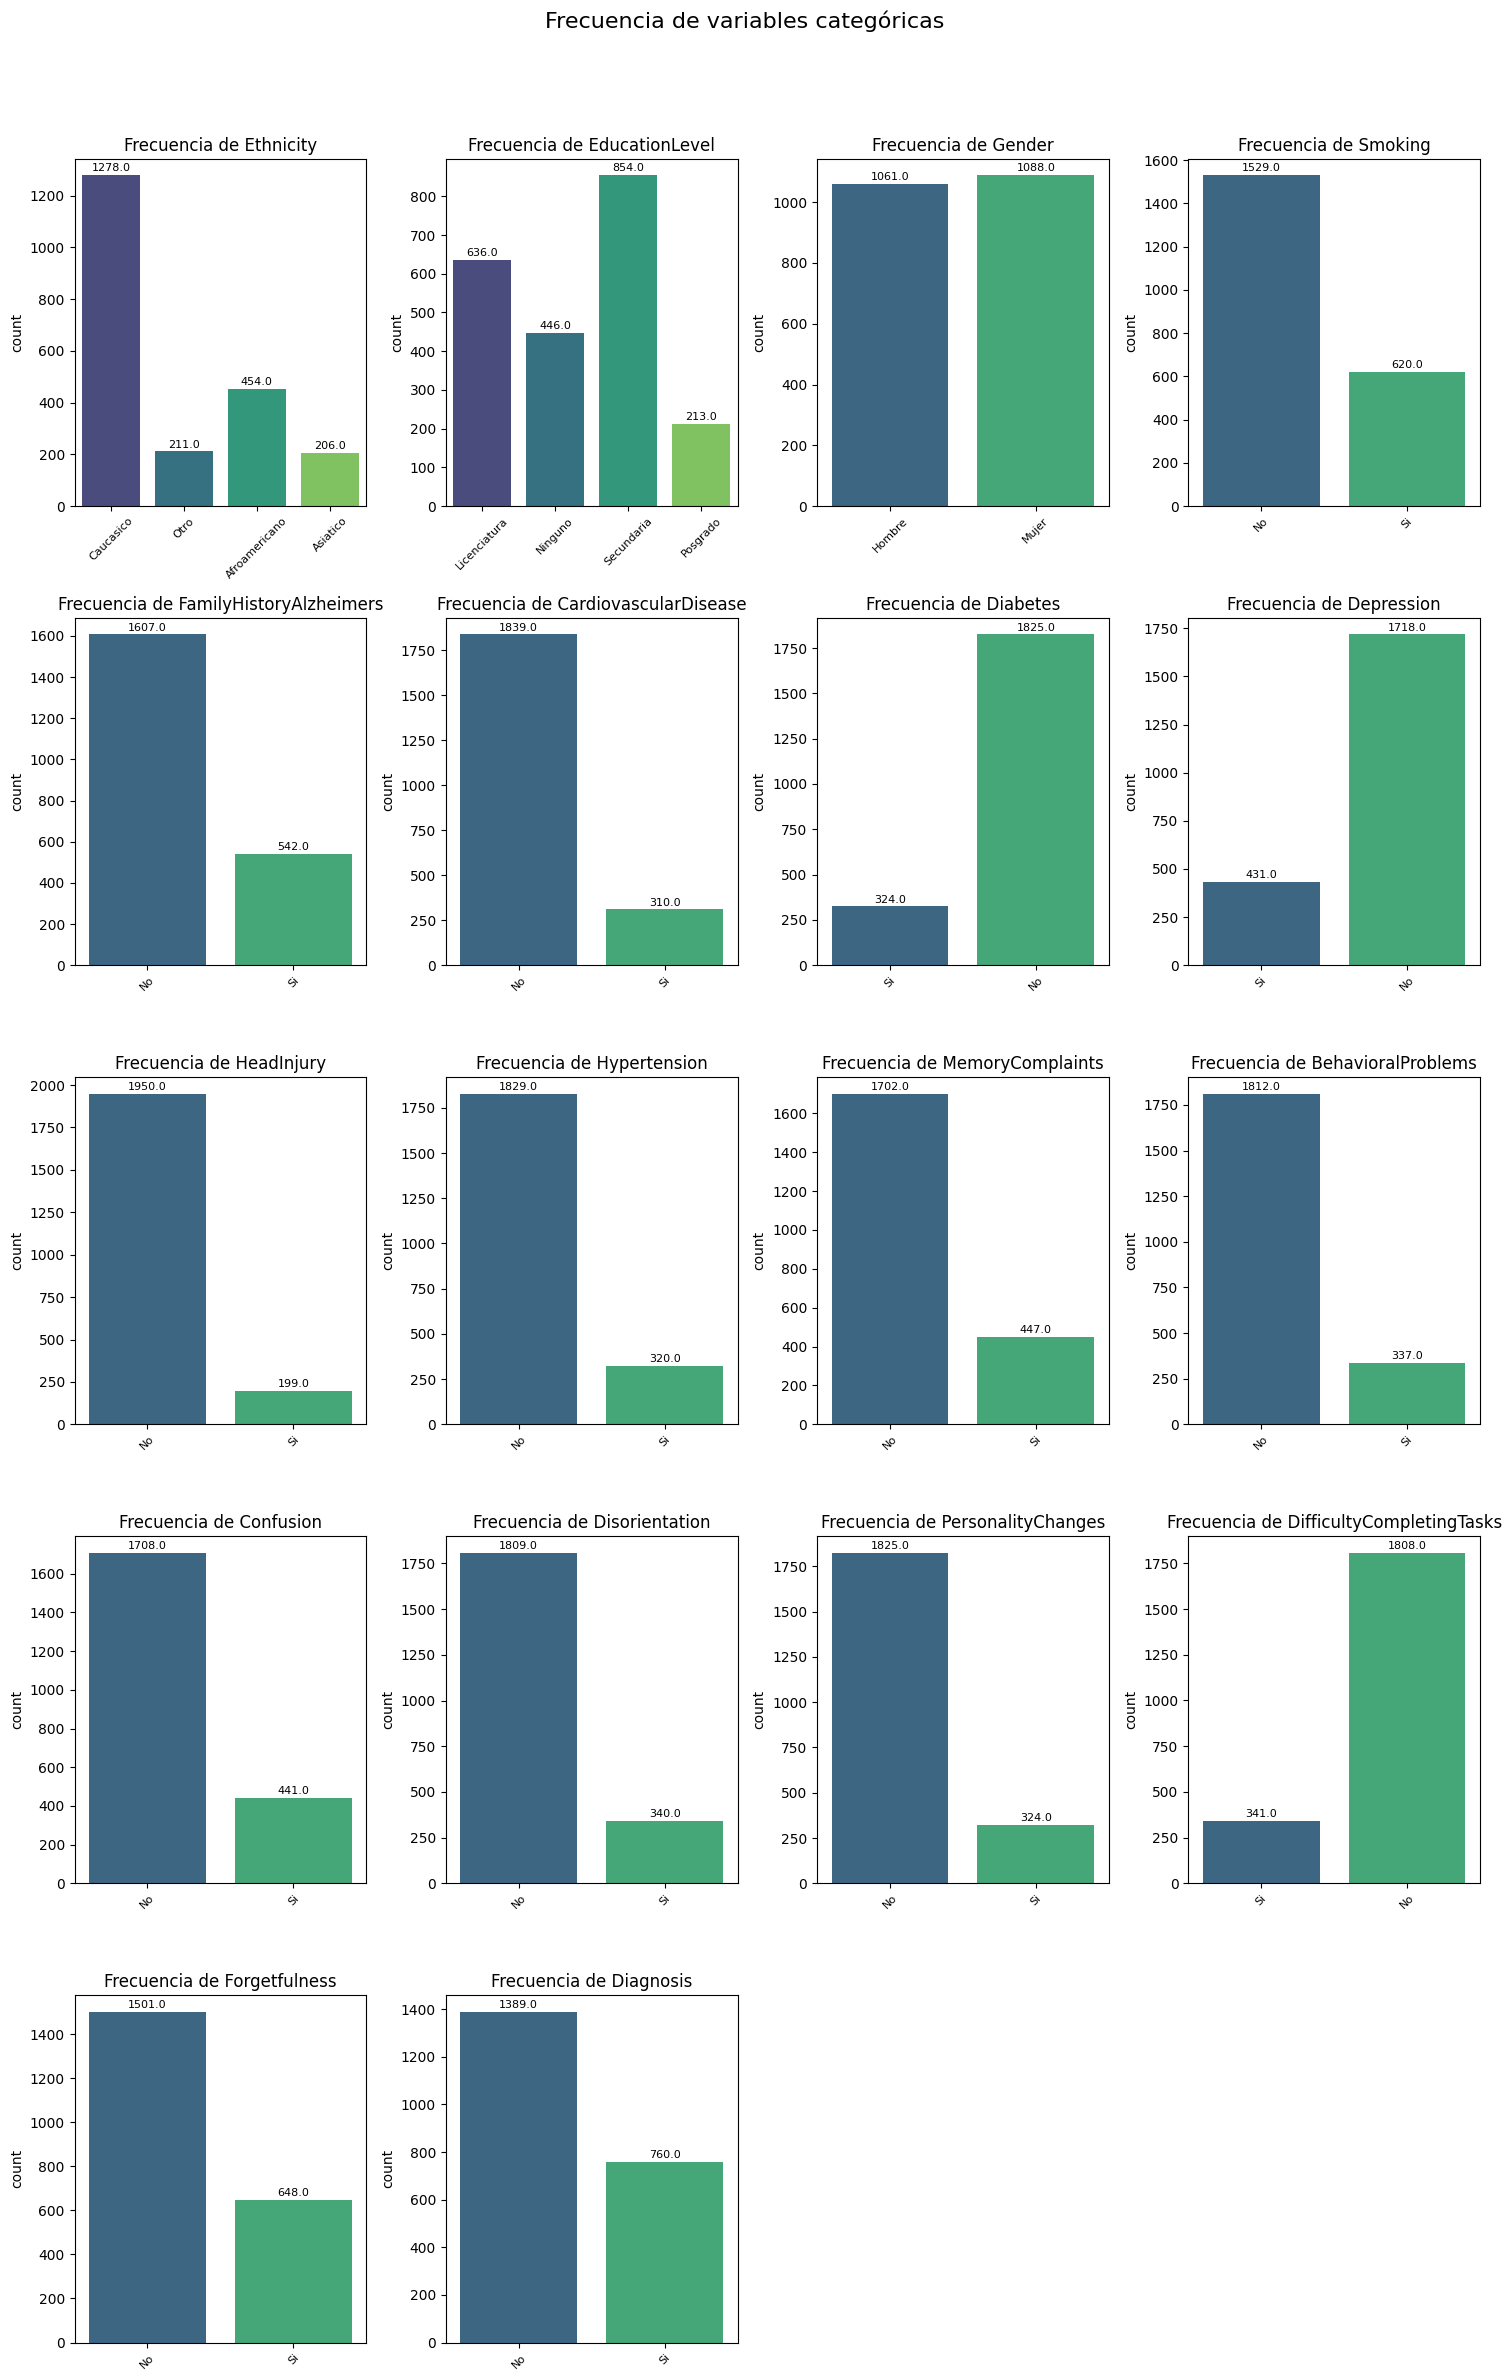

In [ ]:
# Construcción de grafico de frecuencias para variables categoricas
def plot_categorical_frequencies(df, cat_cols):
    num_cols = 4
    num_rows = math.ceil(len(cat_cols) / num_cols)

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
    fig.suptitle("Frecuencia de variables categóricas", fontsize=16)

    for i, col in enumerate(cat_cols):
        row = i // num_cols
        col_num = i % num_cols
        ax = axes[row, col_num] if num_rows > 1 else axes[col_num]

        sns.countplot(x=col, data=df, ax=ax, palette="viridis")
        ax.set_title(f"Frecuencia de {col}")
        ax.set_xlabel("")
        ax.tick_params(axis='x', rotation=45, labelsize = 8)
        for p in ax.patches:
            ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                        textcoords='offset points')

    for j in range(len(cat_cols), num_rows * num_cols):
        row = j // num_cols
        col_num = j % num_cols
        if num_rows > 1 :
          axes[row, col_num].set_axis_off()
        else:
          axes[col_num].set_axis_off()

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

plot_categorical_frequencies(df_encoded, catCol)

In [ ]:
# División de variables númericas

numCol = ['Age','BMI', 'AlcoholConsumption',
                        'PhysicalActivity', 'DietQuality', 'SleepQuality', 'SystolicBP',
                        'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
                        'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'ADL']

df[numCol].head(2)

,Age,BMI,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,ADL
0,73,22.9277,13.2972,6.3271,1.3472,9.0257,142,72,242.3668,56.1509,33.6826,162.1891,21.4635,6.5189,1.7259
1,89,26.8277,4.5425,7.6199,0.5188,7.1513,115,64,231.1626,193.4080,79.0285,294.6309,20.6133,7.1187,2.5924


Imputaciones

In [ ]:
df.isnull().sum()

,0
Age,0
Gender,0
Ethnicity,0
EducationLevel,0
BMI,0
Smoking,0
AlcoholConsumption,0
PhysicalActivity,0
DietQuality,0
SleepQuality,0


No se requiere imputaciones ya que no se presentan datos nulos o faltantes en el dataframe.

Transformaciones

A partir del análisis de las variables no se identifican transformaciones que se requieran aplicar.

## 5.2 División del conjunto de datos

In [ ]:
df.groupby('Diagnosis').Diagnosis.count().sort_values(ascending=False)

,Diagnosis
Diagnosis,
0,1389
1,760


In [ ]:
# Porcentaje de filas para la primera parte
percentage_first_part = 0.80

# Número de filas para la primera parte
n_rows_part1 = int(len(df) * percentage_first_part)

# Obtener índices aleatorios para la primer parte
indices_part1 = df.sample(n=n_rows_part1, random_state=123).index

# Obtener índices para la segunda parte (resto de las filas)
indices_part2 = df.index.difference(indices_part1)

# Dividir el DataFrame en dos partes
d_e = df.loc[indices_part1]
d_p = df.loc[indices_part2]

In [ ]:
#Identificación de outliers

# crear un objeto LocalOutlierFactor con n_neighbors=13
lof = LocalOutlierFactor(n_neighbors=13, contamination=0.1)

# identificar los valores atípicos por medio de lof
y_pred = lof.fit_predict(d_e[numCol])

# Identificar los índices de los valores atípicos
outliers = y_pred == -1

print('Indices de valores atípicos: ', d_e[outliers].index.tolist())

Indices de valores atípicos:  [1042, 120, 1772, 1501, 734, 43, 1934, 668, 1103, 1372, 1370, 1385, 1917, 504, 1220, 409, 1298, 1823, 440, 1033, 891, 292, 761, 777, 433, 2056, 1020, 1856, 91, 641, 917, 1541, 2092, 981, 2023, 189, 356, 827, 1580, 66, 682, 403, 822, 1046, 1493, 1822, 1361, 1129, 437, 1927, 1473, 2121, 1569, 1730, 1937, 115, 394, 670, 1623, 1941, 1998, 134, 1762, 1120, 196, 1835, 1145, 1171, 379, 1274, 332, 1815, 1976, 1744, 173, 283, 2132, 1925, 1972, 1618, 1198, 976, 2129, 637, 1387, 1386, 1423, 348, 1164, 250, 1294, 1826, 45, 759, 1759, 33, 621, 599, 1532, 1135, 352, 1840, 2024, 1698, 1892, 344, 391, 1031, 1717, 299, 313, 1471, 1286, 1272, 1356, 418, 825, 793, 1872, 2072, 1331, 812, 1736, 1755, 2028, 1614, 2063, 541, 1909, 1170, 79, 1621, 1380, 1889, 1101, 470, 2014, 1950, 211, 1071, 619, 363, 1642, 864, 1561, 1553, 690, 1591, 1307, 2044, 1300, 192, 788, 1687, 916, 1968, 804, 268, 1654, 1140, 2094, 32, 38, 1319, 823, 719, 794, 1617, 1410, 1225, 730, 1539]


In [ ]:
d_e = d_e.loc[~outliers]

In [ ]:
d_e.shape

(1547, 33)

# **Preparación datos de entrenamiento**

Balanceo de los datos

In [ ]:
d_e.groupby('Diagnosis').Diagnosis.count().sort_values(ascending=False)

,Diagnosis
Diagnosis,
0,1006
1,541


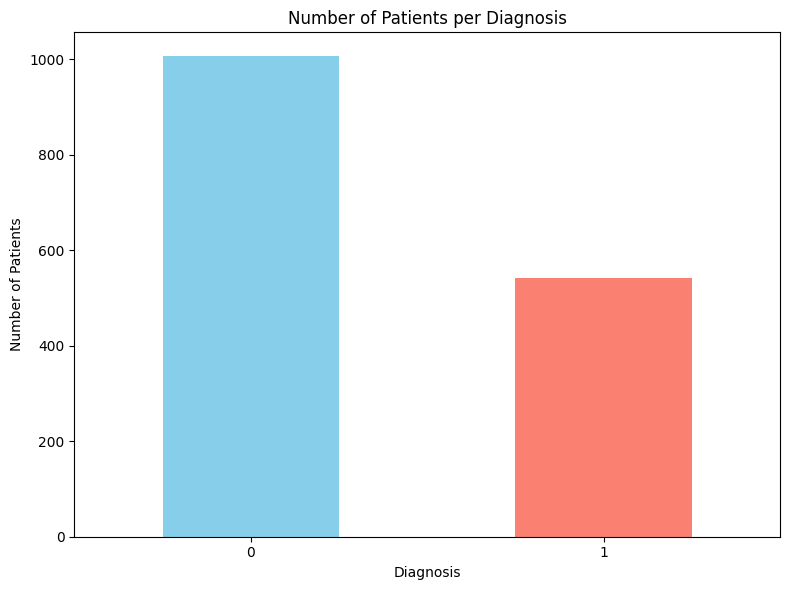

In [ ]:
#Balanceo de datos
diagnosis_counts = d_e.groupby('Diagnosis')['Diagnosis'].count()


plt.figure(figsize=(8, 6))
diagnosis_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Number of Patients per Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Number of Patients')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
oversampler = RandomOverSampler()

# Se realiza el sobremuestreo para las variables de entrada y salida
X_resampled, y_resampled = oversampler.fit_resample(d_e.drop('Diagnosis', axis=1), d_e['Diagnosis'])

d_e1 = pd.DataFrame(X_resampled, columns=df.columns.drop('Diagnosis'))
d_e2 = pd.DataFrame(y_resampled)

df_balanced = pd.concat([d_e1, d_e2], axis=1)

d_e=df_balanced

d_e.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,84,1,2,0,29.8787,0,18.7481,3.8904,6.1918,8.1289,...,9.8117,1,0,7.3974,0,0,0,0,0,0
1,66,1,0,0,27.8053,1,5.0108,0.8974,9.9525,7.9548,...,9.2821,1,0,0.1964,0,0,0,0,0,1
2,78,0,3,0,30.5371,0,11.6409,9.2947,7.9331,8.1392,...,4.9538,0,0,7.8849,0,0,0,1,1,0
3,81,1,0,0,25.8534,0,3.8092,5.1980,9.8091,6.7553,...,5.0213,0,0,9.5666,0,1,0,0,0,0
4,68,0,3,0,37.6589,1,19.9214,2.4670,4.0801,4.0234,...,2.1980,1,1,1.1602,0,1,0,0,0,1


In [ ]:
d_e.groupby('Diagnosis').Diagnosis.count().sort_values(ascending=False)

,Diagnosis
Diagnosis,
0,1006
1,1006


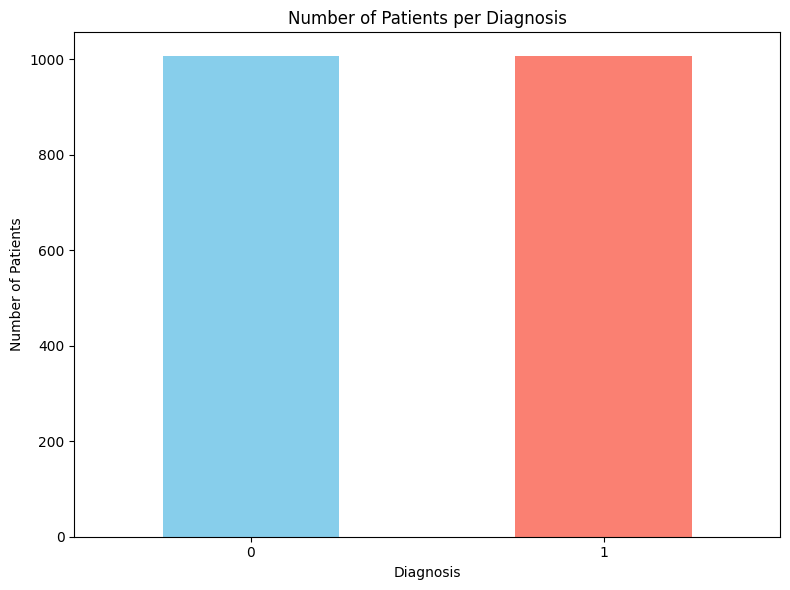

In [ ]:
#Visualizacion del balanceo
diagnosis_counts = d_e.groupby('Diagnosis')['Diagnosis'].count()

# Create a bar plot
plt.figure(figsize=(8, 6))
diagnosis_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Number of Patients per Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Number of Patients')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


 Creación de variables Dummies

In [ ]:
ethnicity_mapping = {
    0: 'Caucásico',
    1: 'Afroamericano',
    2: 'Asiático',
    3: 'Otro'
}

d_e['Ethnicity'] = d_e['Ethnicity'].replace(ethnicity_mapping)
d_e=pd.get_dummies(d_e, drop_first=1).astype('int64')
d_e.head()


,Age,Gender,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,...,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,Ethnicity_Asiático,Ethnicity_Caucásico,Ethnicity_Otro
0,84,1,0,29,0,18,3,6,8,0,...,7,0,0,0,0,0,0,1,0,0
1,66,1,0,27,1,5,0,9,7,0,...,0,0,0,0,0,0,1,0,1,0
2,78,0,0,30,0,11,9,7,8,0,...,7,0,0,0,1,1,0,0,0,1
3,81,1,0,25,0,3,5,9,6,1,...,9,0,1,0,0,0,0,0,1,0
4,68,0,0,37,1,19,2,4,4,0,...,1,0,1,0,0,0,1,0,0,1


In [ ]:
#Se crea una lista con todas las varibles de entrada

vDep = list(d_e.columns)
vDep.remove('Diagnosis')

#Se establece las variables de entrada 'X' y la variable de salida 'y'
X = d_e.drop(columns ='Diagnosis')
y = d_e['Diagnosis']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 123,
                                        shuffle      = True
                                    )

 Escalar variables:

In [ ]:
pd.set_option('display.float_format', lambda x: '%.4f' % x)

# Se crea un objeto MinMaxScaler
scaler = MinMaxScaler()

# Se escalan los valores del dataset entrenamiento y prueba de las columnas numéricas
X_train[numCol] = scaler.fit_transform(X_train[numCol])
X_test[numCol] = scaler.transform(X_test[numCol])

X_test[numCol].head(2)



,Age,BMI,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,ADL
1127,0.2333,1.0000,0.0000,0.5556,0.3333,0.6000,0.3146,0.1186,0.3624,0.3960,0.5570,0.2436,0.5862,0.7778,0.1111
1857,0.4667,0.7917,0.9474,0.1111,0.1111,0.0000,0.9888,0.3898,0.9060,0.8926,0.0127,0.4499,0.0690,0.0000,0.3333


In [ ]:
X_test

,Age,Gender,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,...,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Ethnicity_Asiático,Ethnicity_Caucásico,Ethnicity_Otro
1127,0.2333,0,0,1.0000,1,0.0000,0.5556,0.3333,0.6000,1,...,0,0.1111,0,0,0,0,1,0,1,0
1857,0.4667,1,1,0.7917,0,0.9474,0.1111,0.1111,0.0000,0,...,0,0.3333,0,0,0,0,0,0,1,0
891,0.4000,1,3,0.3333,0,0.1579,0.5556,0.8889,1.0000,0,...,0,0.7778,1,0,1,1,0,0,1,0
1367,0.7667,0,2,0.1250,1,0.4211,0.7778,0.2222,0.6000,0,...,0,0.6667,1,0,0,0,0,1,0,0
1482,0.9333,0,2,0.1667,1,0.3158,0.0000,0.6667,1.0000,0,...,0,0.6667,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1244,0.6000,0,2,0.2917,1,1.0000,0.3333,0.8889,0.8000,0,...,0,0.5556,0,1,0,1,1,0,1,0
1673,1.0000,1,1,0.5417,0,0.5263,0.1111,0.4444,0.2000,0,...,1,0.3333,0,0,0,1,0,0,0,0
1724,0.1000,0,1,0.3333,1,0.8947,0.8889,0.8889,0.8000,0,...,0,0.1111,0,0,0,0,0,0,0,1
1129,0.5333,0,0,0.5000,0,0.3684,0.8889,0.0000,0.4000,0,...,1,0.6667,0,0,0,0,0,0,0,0


Escalado de X completo

In [ ]:
scaler = MinMaxScaler()

# Se escalan los valores del dataset entrenamiento y prueba de las columnas numéricas
X[numCol] = scaler.fit_transform(X[numCol])

X[numCol].head()

# Guardar el scaler en un archivo .pkl
joblib.dum
p(scaler, "minmax_scaler.pkl")



['minmax_scaler.pkl']

# **Preparación de datos de prueba**

In [ ]:
d_p.info()

<class 'pandas.core.frame.DataFrame'>
Index: 430 entries, 1 to 2148
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        430 non-null    int64  
 1   Gender                     430 non-null    int64  
 2   Ethnicity                  430 non-null    int64  
 3   EducationLevel             430 non-null    int64  
 4   BMI                        430 non-null    float64
 5   Smoking                    430 non-null    int64  
 6   AlcoholConsumption         430 non-null    float64
 7   PhysicalActivity           430 non-null    float64
 8   DietQuality                430 non-null    float64
 9   SleepQuality               430 non-null    float64
 10  FamilyHistoryAlzheimers    430 non-null    int64  
 11  CardiovascularDisease      430 non-null    int64  
 12  Diabetes                   430 non-null    int64  
 13  Depression                 430 non-null    int64  
 14

In [ ]:
# División de variables númericas

numColp = ['Age','BMI', 'AlcoholConsumption',
                        'PhysicalActivity', 'DietQuality', 'SleepQuality', 'SystolicBP',
                        'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL',
                        'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'ADL']

d_p[numColp].head(2)

,Age,BMI,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,ADL
1,89,26.8277,4.5425,7.6199,0.5188,7.1513,115,64,231.1626,193.4080,79.0285,294.6309,20.6133,7.1187,2.5924
3,74,33.8008,12.2093,8.4280,7.4356,8.3926,118,115,159.5822,65.3666,68.4575,277.5774,13.9911,8.9651,6.4812


In [ ]:
# División de variables binarias (categoricas)
catColp = [
    'Ethnicity', 'EducationLevel','Gender', 'Smoking', 'FamilyHistoryAlzheimers', 'CardiovascularDisease',
    'Diabetes', 'Depression', 'HeadInjury', 'Hypertension', 'MemoryComplaints',
    'BehavioralProblems', 'Confusion', 'Disorientation', 'PersonalityChanges',
    'DifficultyCompletingTasks', 'Forgetfulness', 'Diagnosis'
]

d_p[catColp].head(2)

,Ethnicity,EducationLevel,Gender,Smoking,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,MemoryComplaints,BehavioralProblems,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
#Eliminar la variable de salida de la lista de variable numéricas
catColp.remove('Diagnosis')

Variable salida

In [ ]:
# Distriución de la variable de salida

d_p.groupby('Diagnosis').Diagnosis.count().sort_values(ascending=False)

,Diagnosis
Diagnosis,
0,277
1,153


Transformaciones

In [ ]:
#utilización de LocalOutlierFactor con 13 vecinos para identificar valores atípicos en las variables de entrada


# crear un objeto LocalOutlierFactor con n_neighbors=13
lof = LocalOutlierFactor(n_neighbors=13, contamination=0.1)

# identificar los valires atípicos por medio de lof
y_pred = lof.fit_predict(d_p[numColp])

# Identificar los índices de los valores atípicos
outliers = y_pred == -1

print('Indices de valores atípicos: ', d_p[outliers].index.tolist())

Indices de valores atípicos:  [46, 70, 137, 213, 290, 293, 330, 445, 574, 592, 636, 751, 752, 791, 818, 830, 896, 978, 1013, 1053, 1086, 1100, 1122, 1168, 1213, 1271, 1305, 1464, 1491, 1530, 1557, 1559, 1626, 1669, 1830, 1891, 1902, 1945, 1990, 1991, 2017, 2050, 2081]


In [ ]:
# Eliminar los valores atípicos del dataframe original
d_p = d_p.loc[~outliers]

Creación de variables Dummies

In [ ]:
ethnicity_mapping = {
    0: 'Caucásico',
    1: 'Afroamericano',
    2: 'Asiático',
    3: 'Otro'
}

d_p['Ethnicity'] = d_p['Ethnicity'].replace(ethnicity_mapping)
d_p.head()

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
1,89,0,Caucásico,0,26.8277,0,4.5425,7.6199,0.5188,7.1513,...,7.1187,0,0,2.5924,0,0,0,0,1,0
3,74,1,Caucásico,1,33.8008,1,12.2093,8.4280,7.4356,8.3926,...,8.9651,0,1,6.4812,0,0,0,0,0,0
8,72,1,Afroamericano,0,27.8332,0,12.1678,1.5314,6.7369,5.7482,...,7.3961,0,1,0.7562,0,0,1,0,0,0
14,64,1,Caucásico,2,27.9429,0,2.1758,9.7146,5.3172,9.0871,...,6.7917,0,0,5.5056,1,1,1,0,0,0
16,63,1,Afroamericano,2,22.8229,1,4.4340,7.1829,7.9295,4.6548,...,9.3659,1,0,1.3821,0,0,0,0,0,1


In [ ]:
d_p=pd.get_dummies(d_p, drop_first=1)
d_p.head()

,Age,Gender,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,...,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,Ethnicity_Asiático,Ethnicity_Caucásico,Ethnicity_Otro
1,89,0,0,26.8277,0,4.5425,7.6199,0.5188,7.1513,0,...,2.5924,0,0,0,0,1,0,False,True,False
3,74,1,1,33.8008,1,12.2093,8.4280,7.4356,8.3926,0,...,6.4812,0,0,0,0,0,0,False,True,False
8,72,1,0,27.8332,0,12.1678,1.5314,6.7369,5.7482,0,...,0.7562,0,0,1,0,0,0,False,False,False
14,64,1,2,27.9429,0,2.1758,9.7146,5.3172,9.0871,0,...,5.5056,1,1,1,0,0,0,False,True,False
16,63,1,2,22.8229,1,4.4340,7.1829,7.9295,4.6548,0,...,1.3821,0,0,0,0,0,1,False,False,False


In [ ]:
d_p[['Ethnicity_Asiático', 'Ethnicity_Caucásico', 'Ethnicity_Otro']] = d_p[['Ethnicity_Asiático', 'Ethnicity_Caucásico', 'Ethnicity_Otro']].astype('int64')
d_p.head()

,Age,Gender,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,...,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,Ethnicity_Asiático,Ethnicity_Caucásico,Ethnicity_Otro
1,89,0,0,26.8277,0,4.5425,7.6199,0.5188,7.1513,0,...,2.5924,0,0,0,0,1,0,0,1,0
3,74,1,1,33.8008,1,12.2093,8.4280,7.4356,8.3926,0,...,6.4812,0,0,0,0,0,0,0,1,0
8,72,1,0,27.8332,0,12.1678,1.5314,6.7369,5.7482,0,...,0.7562,0,0,1,0,0,0,0,0,0
14,64,1,2,27.9429,0,2.1758,9.7146,5.3172,9.0871,0,...,5.5056,1,1,1,0,0,0,0,1,0
16,63,1,2,22.8229,1,4.4340,7.1829,7.9295,4.6548,0,...,1.3821,0,0,0,0,0,1,0,0,0


In [ ]:
# Obtener las columnas categóricas que están en el dataframe original pero no en el dataset de pruebas

missingCols = set(d_e.columns) - set(d_p.columns)

# Agregar columnas con valores predeterminados 0
for col in missingCols:
    d_p[col] = 0

In [ ]:
missingCols

set()

In [ ]:
d_p

,Age,Gender,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,...,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,Ethnicity_Asiático,Ethnicity_Caucásico,Ethnicity_Otro
1,89,0,0,26.8277,0,4.5425,7.6199,0.5188,7.1513,0,...,2.5924,0,0,0,0,1,0,0,1,0
3,74,1,1,33.8008,1,12.2093,8.4280,7.4356,8.3926,0,...,6.4812,0,0,0,0,0,0,0,1,0
8,72,1,0,27.8332,0,12.1678,1.5314,6.7369,5.7482,0,...,0.7562,0,0,1,0,0,0,0,0,0
14,64,1,2,27.9429,0,2.1758,9.7146,5.3172,9.0871,0,...,5.5056,1,1,1,0,0,0,0,1,0
16,63,1,2,22.8229,1,4.4340,7.1829,7.9295,4.6548,0,...,1.3821,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2125,70,1,2,35.5922,1,17.1056,4.5483,1.2645,8.1978,0,...,5.9185,0,0,0,0,1,1,1,0,0
2127,89,1,1,35.8061,1,13.0764,6.5233,8.5913,6.0696,0,...,1.4765,0,0,0,0,0,0,1,0,0
2137,86,0,0,24.2260,0,10.8909,2.9386,5.5309,6.9725,1,...,9.8708,0,0,0,0,0,0,0,0,1
2140,89,0,2,34.4224,0,7.7707,0.9476,5.7321,4.9178,0,...,8.7341,0,1,0,0,0,0,0,0,0


In [ ]:
#Se establece las variables de entrada 'X' y la variable de salida 'y'

Xp = d_p.drop(columns ='Diagnosis')
yp = d_p['Diagnosis']

In [ ]:
#Escalar Variables númericas

pd.set_option('display.float_format', lambda x: '%.4f' % x)

# Cargar el scaler
scaler = joblib.load("minmax_scaler.pkl")

# Se escalan los valores del dataset entrenamiento y prueba de las columnas numéricas
Xp[numColp] = scaler.transform(Xp[numColp])

Xp[numColp].head(2)


,Age,BMI,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,ADL
1,0.9667,0.4928,0.2391,0.8467,0.0576,0.6303,0.2809,0.0678,0.5447,0.9625,0.7472,0.7009,0.7108,0.7910,0.2880
3,0.4667,0.7834,0.6426,0.9364,0.8262,0.8785,0.3146,0.9322,0.0643,0.1031,0.6134,0.6521,0.4825,0.9961,0.7201


# 5.3 Creación, entrenamiento y evaluación de modelos:

In [ ]:
#Función para la creación y entrenamiento de modelos:

def entrenar_modelo(X_train, y_train, X, y):
    modelos = []

    # 1. Regresión Logística (liblinear)
    modelo1 = LogisticRegression(solver='liblinear', multi_class='ovr')
    modelo1.fit(X_train, y_train)
    score1 = modelo1.score(X_train, y_train)
    modelos.append(("Logistic_liblinear", modelo1, score1))

    # 2. Regresión Logística (lbfgs)
    modelo2 = LogisticRegression(solver='lbfgs', max_iter=1000, multi_class='ovr')
    modelo2.fit(X_train, y_train)
    score2 = modelo2.score(X_train, y_train)
    modelos.append(("Logistic_lbfgs", modelo2, score2))

    # 3. SVM Lineal con GridSearchCV
    param_grid_svm_linear = {
        'C': [0.001, 0.01, 0.1, 1, 5, 10]
    }
    grid_svm_linear = GridSearchCV(SVC(kernel='linear'), param_grid_svm_linear, cv=10)
    grid_svm_linear.fit(X, y)
    modelos.append(("SVM_Linear", grid_svm_linear.best_estimator_, grid_svm_linear.best_score_))

    # 4. SVM Polinómico con GridSearchCV
    param_grid_svm_poly = {
        'C': [0.001, 0.01, 0.1, 1, 5, 10],
        'degree': [2, 3],
        'gamma': ['scale', 'auto'],
        'coef0': [0, 1]
    }
    grid_svm_poly = GridSearchCV(SVC(kernel='poly'), param_grid_svm_poly, cv=10)
    grid_svm_poly.fit(X, y)
    modelos.append(("SVM_Polynomial", grid_svm_poly.best_estimator_, grid_svm_poly.best_score_))

    # 5. Árbol de decisión
    modelo5 = DecisionTreeClassifier(max_depth=3, criterion='gini',random_state=123)
    modelo5.fit(X_train, y_train)
    score5 = modelo5.score(X_train, y_train)
    modelos.append(("DecisionTree", modelo5, score5))

    # 6. Random Forest con GridSearchCV
    param_grid_rf = {
        'n_estimators': [100, 120],
        'max_features': [5,7,10,15],
        'max_depth': [3, 5, 10, 15],
        'criterion': ['gini', 'entropy']
    }
    grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=10)
    grid_rf.fit(X, y)
    modelos.append(("RandomForest", grid_rf.best_estimator_, grid_rf.best_score_))

    return modelos

In [ ]:
from sklearn.metrics import accuracy_score, f1_score
import pandas as pd

def obtener_mejor_modelo_por_f1(modelos, X_test, y_test, save_path="mejor_modelo.pkl"):

    resultados = []
    mejores_modelos = []

    for nombre, modelo, score_validacion in modelos:
        y_pred = modelo.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')
        resultados.append({
            "Nombre del Modelo": nombre,
            "Score Validación (CV)": score_validacion,
            "Precisión en Test": acc,
            "F1 Score en Test": f1
        })
        mejores_modelos.append((nombre, modelo, f1))

    resultados_df = pd.DataFrame(resultados)
    resultados_df = resultados_df.sort_values(by="F1 Score en Test", ascending=False).reset_index(drop=True)

    # Obtener el mejor modelo
    mejor_nombre, mejor_modelo, mejor_f1 = max(mejores_modelos, key=lambda x: x[2])
    print(f"Mejor modelo: {mejor_nombre} con F1-score en test: {mejor_f1:.4f}")

    # Guardar el modelo
    joblib.dump(mejor_modelo, save_path)
    print(f"Modelo guardado en: {save_path}")


    return mejor_modelo, resultados_df

In [ ]:
# Evaluar modelos con X_train, Y_train
modelos_entrenados = entrenar_modelo(X_train, y_train, X, y)
mejor_modelo, resultados = obtener_mejor_modelo_por_f1(modelos_entrenados, X_train, y_train)
print(resultados)

Mejor modelo: RandomForest con F1-score en test: 1.0000
Modelo guardado en: mejor_modelo.pkl
    Nombre del Modelo  Score Validación (CV)  Precisión en Test  \
0        RandomForest                 0.9781             1.0000   
1      SVM_Polynomial                 0.8728             0.9876   
2          SVM_Linear                 0.8385             0.8446   
3      Logistic_lbfgs                 0.8440             0.8440   
4  Logistic_liblinear                 0.8434             0.8434   
5        DecisionTree                 0.8111             0.8111   

   F1 Score en Test  
0            1.0000  
1            0.9876  
2            0.8446  
3            0.8440  
4            0.8434  
5            0.8062  


In [ ]:
# Evaluar modelos con X_test, Y_test
modelos_entrenados = entrenar_modelo(X_train, y_train, X, y)
mejor_modelo, resultados = obtener_mejor_modelo_por_f1(modelos_entrenados, X_test, y_test)
print(resultados)

Mejor modelo: RandomForest con F1-score en test: 1.0000
Modelo guardado en: mejor_modelo.pkl
    Nombre del Modelo  Score Validación (CV)  Precisión en Test  \
0        RandomForest                 0.9781             1.0000   
1      SVM_Polynomial                 0.8728             0.9901   
2          SVM_Linear                 0.8385             0.8462   
3      Logistic_lbfgs                 0.8440             0.8337   
4        DecisionTree                 0.8111             0.8288   
5  Logistic_liblinear                 0.8434             0.8238   

   F1 Score en Test  
0            1.0000  
1            0.9901  
2            0.8461  
3            0.8336  
4            0.8265  
5            0.8237  


# **6. Evaluación entre modelos de clasificación.**

In [ ]:
# Evaluar modelos con Xp, Yp
modelos_entrenados = entrenar_modelo(X_train, y_train, X, y)

mejor_modelo, resultados = obtener_mejor_modelo_por_f1(modelos_entrenados, Xp, yp)
print(resultados)


Mejor modelo: RandomForest con F1-score en test: 0.9159
Modelo guardado en: mejor_modelo.pkl
    Nombre del Modelo  Score Validación (CV)  Precisión en Test  \
0        RandomForest                 0.9781             0.9173   
1          SVM_Linear                 0.8385             0.8424   
2  Logistic_liblinear                 0.8434             0.8346   
3      Logistic_lbfgs                 0.8440             0.8320   
4        DecisionTree                 0.8111             0.8217   
5      SVM_Polynomial                 0.8728             0.7829   

   F1 Score en Test  
0            0.9159  
1            0.8408  
2            0.8335  
3            0.8304  
4            0.8077  
5            0.7776  


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
def plot_roc_modelos_entrenados(modelos, X_test, y_test):

    plt.figure(figsize=(10, 8))
    for nombre, modelo, _ in modelos:
        # Verifica si el modelo tiene predict_proba o decision_function
        if hasattr(modelo, "predict_proba"):
            y_score = modelo.predict_proba(X_test)[:, 1]
        elif hasattr(modelo, "decision_function"):
            y_score = modelo.decision_function(X_test)
        else:
            print(f"Modelo {nombre} no soporta predict_proba ni decision_function. Omitido.")
            continue

        fpr, tpr, _ = roc_curve(y_test, y_score)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=2, label=f'{nombre} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('Tasa de Falsos Positivos (FPR)')
    plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
    plt.title('Curva ROC de Modelos')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()

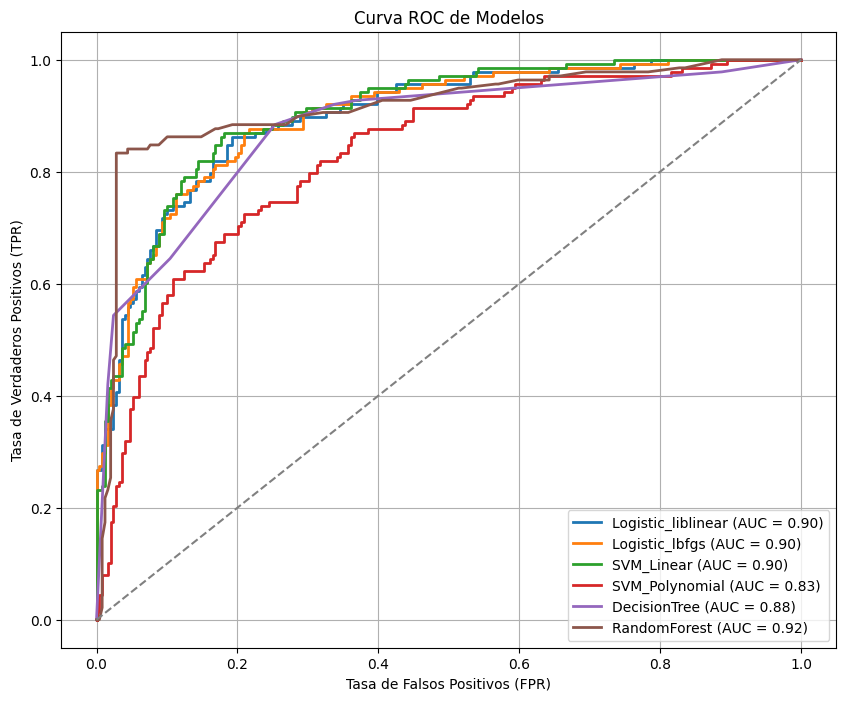

In [ ]:
plot_roc_modelos_entrenados(modelos_entrenados, Xp, yp)

Caso práctico:

In [ ]:
    data= {"Age": [74],
    "Gender": [0],
    "Ethnicity": [0],
    "EducationLevel": [2],
    "BMI": [27.5],
    "Smoking": [0],
    "AlcoholConsumption": [0],
    "PhysicalActivity": [3.5],
    "DietQuality": [7],
    "SleepQuality": [6],
    "FamilyHistoryAlzheimers": [1],
    "CardiovascularDisease": [1],
    "Diabetes": [1],
    "Depression": [1],
    "HeadInjury": [0],
    "Hypertension": [1],
    "SystolicBP": [142],
    "DiastolicBP": [86],
    "CholesterolTotal": [235],
    "CholesterolLDL": [140],
    "CholesterolHDL": [48],
    "CholesterolTriglycerides": [175],
    "MMSE": [22],
    "FunctionalAssessment": [6],
    "MemoryComplaints": [0],
    "BehavioralProblems": [0],
    "ADL": [7],
    "Confusion": [1],
    "Disorientation": [1],
    "PersonalityChanges": [1],
    "DifficultyCompletingTasks": [1],
    "Forgetfulness":[1]}

In [ ]:
import joblib
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Cargar el scaler
scaler = joblib.load("minmax_scaler.pkl")

# Cargar el mejor modelo
mejor_modelo = joblib.load("mejor_modelo.pkl")

# Suponiendo que 'nuevos_datos' es un DataFrame con las mismas columnas que X (sin 'Diagnosis')
# y con los datos de entrada para la predicción.
# Reemplaza esto con tus datos reales
nuevos_datos = pd.DataFrame(data)

ethnicity_mapping = {
    0: 'Caucásico',
    1: 'Afroamericano',
    2: 'Asiático',
    3: 'Otro'
}

nuevos_datos['Ethnicity'] = nuevos_datos['Ethnicity'].replace(ethnicity_mapping)

# Get missing columns and add them to nuevos_datos
missing_cols = set(X.columns) - set(nuevos_datos.columns)
for col in missing_cols:
    nuevos_datos[col] = 0  # or any appropriate default value

nuevos_datos = pd.get_dummies(nuevos_datos, drop_first=1).astype('int64')

# Obtener las columnas numéricas
numCol = ['Age','BMI', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'SystolicBP', 'DiastolicBP', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'MMSE', 'FunctionalAssessment', 'ADL']

# Escalar las variables numéricas de los nuevos datos
nuevos_datos[numCol] = scaler.transform(nuevos_datos[numCol])

# Eliminar la columna 'Diagnosis' si está presente
if 'Diagnosis' in nuevos_datos.columns:
    nuevos_datos = nuevos_datos.drop(columns='Diagnosis')

# Reorder columns to match training data
nuevos_datos = nuevos_datos[X.columns]

# Realizar la predicción
prediccion = mejor_modelo.predict(nuevos_datos)

print("Predicción:", prediccion)

Predicción: [0]


# **7. Conclusiones**

- Se logró la consturcción de diferentes modelos eficaces para predecir la enfermedad de Alzheimer a partir de datos clínicos, demográficos y de estilo de vida de los pacientes.

- Se probaron varios modelos de clasificación mediante validación cruzada y ajuste de hiperparámetros, concluyendo que el modelo Random Forest fue el más robusto y preciso.

- La evaluación del modelo con distintos conjuntos de datos y el análisis de las métricas obtenidas permitieron evidenciar que los modelos desarrollados presentan poco sobreajuste, a pesar del balanceo de los datos, ya que su desempeño se mantuvo consistente entre los conjuntos de entrenamiento, prueba y validación.

# **8. Referencias**

- Dataset empleado:
https://www.kaggle.com/datasets/rabieelkharoua/alzheimers-disease-dataset?resource=download

- Train test split:
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

- Random Forest:
https://scikit-learn.org/1.6/modules/generated/sklearn.ensemble.RandomForestClassifier.html